## Deblazing HPF spectra

THe blaze function is a conspicuous feature of echelle spectrographs, a large upside down `U` shape enveloping the raw 1D echelle orders.  The process of removing this instrumental artifact is deblazing, and we have mentioned it in previous tutorials.  Here we show a new technique to deblazing based on calibration templates that are now built into `muler` automatically.  This deblazing process is imperfect, but adequate for many purposes.

In [1]:
%config InlineBackend.figure_format='retina'
from muler.hpf import HPFSpectrumList

In [2]:
spectra = HPFSpectrumList.read('../../data/HPF/Goldilocks_20210517T054403_v1.0_0060.spectra.fits')

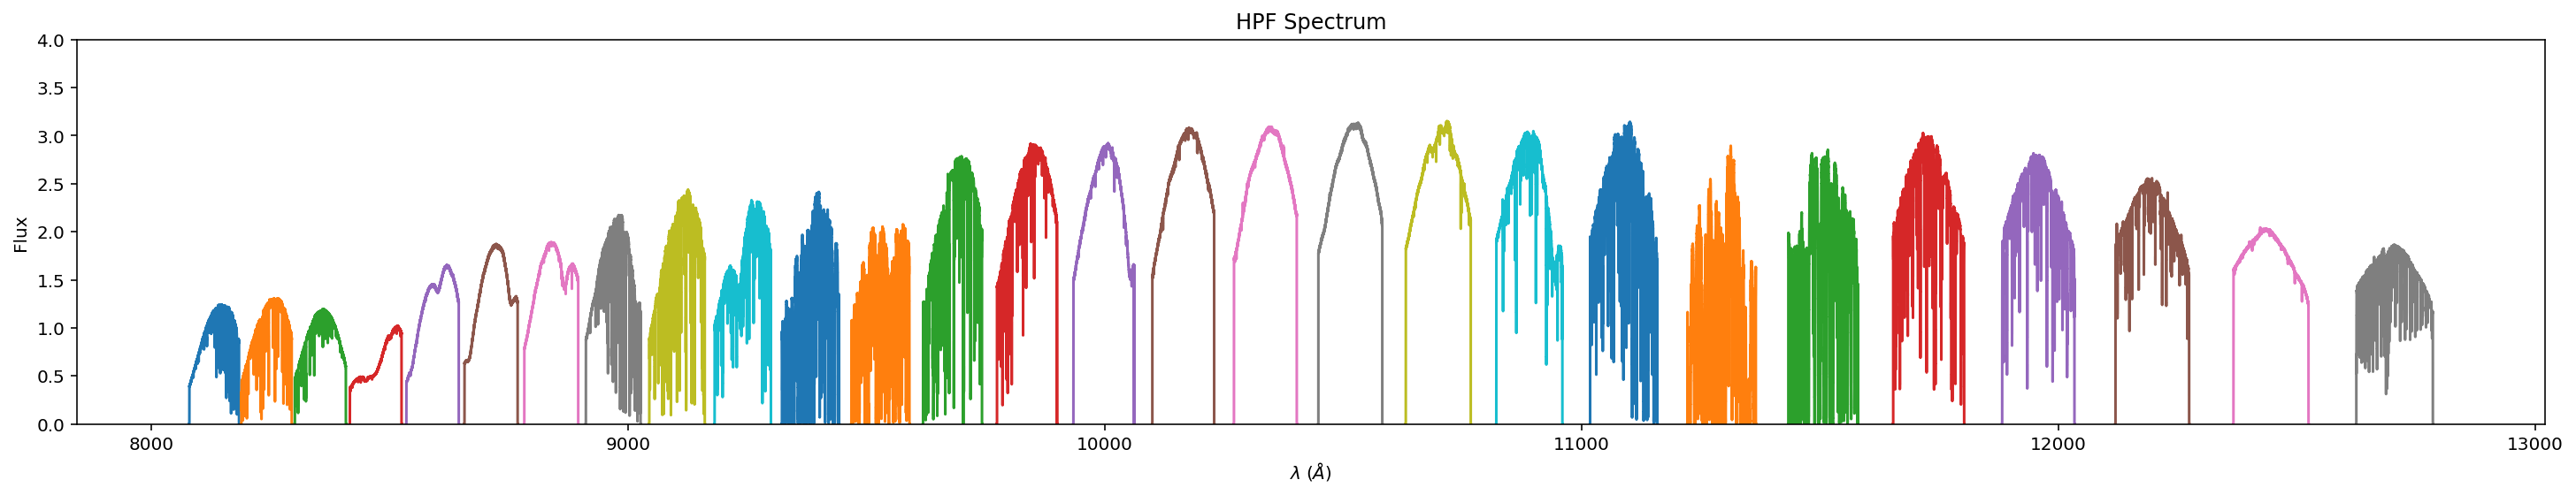

In [3]:
spectra.normalize().plot(ylo=0, yhi=4);

We see the conspicuous blaze pattern in each spectra order.  Let's apply a correction to one of those orders:

In [4]:
spectrum = spectra[15]
new_spectrum = spectrum.deblaze()

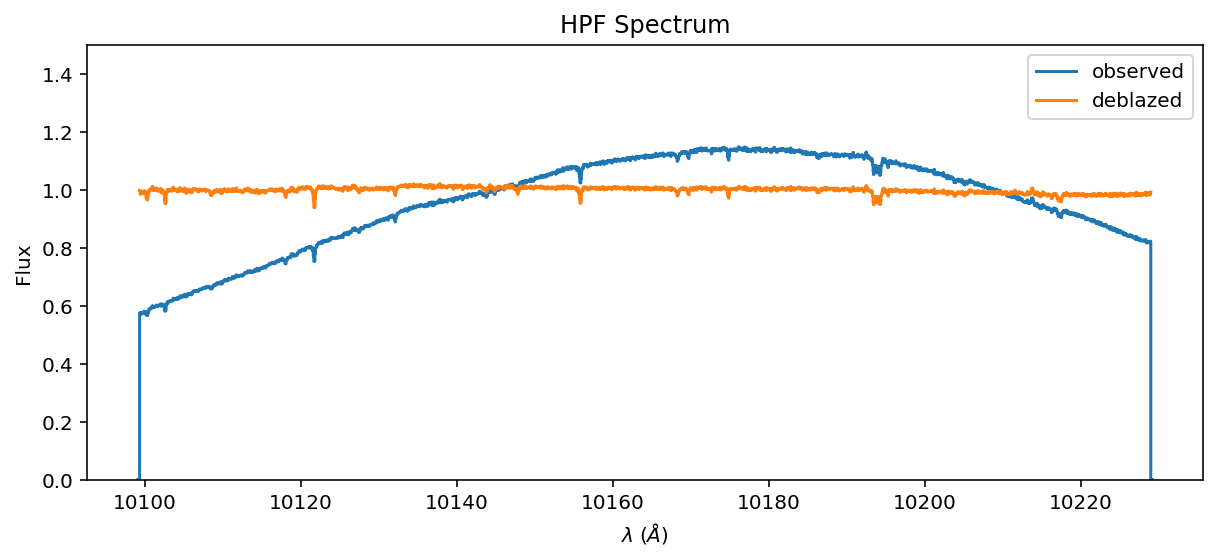

In [5]:
ax = spectrum.normalize().plot(ylo=0, yhi=1.5, label='observed')
new_spectrum.normalize().plot(ax=ax, label='deblazed');
ax.legend();

Nice!  We see that the plunging edges have come closer to the a nearly flat native spectral tilt of a stellar spectrum (with some telluric absorption features still present).  Since the deblazing step is spectrally smooth, it does not add any noise.  The entire spectrum of this A0V star will have both telluric lines and broad Hydrogen lines.  The deblazing correction is known to be coarse, with the most conspicuous imperfections near 1150 - 1210 nm.

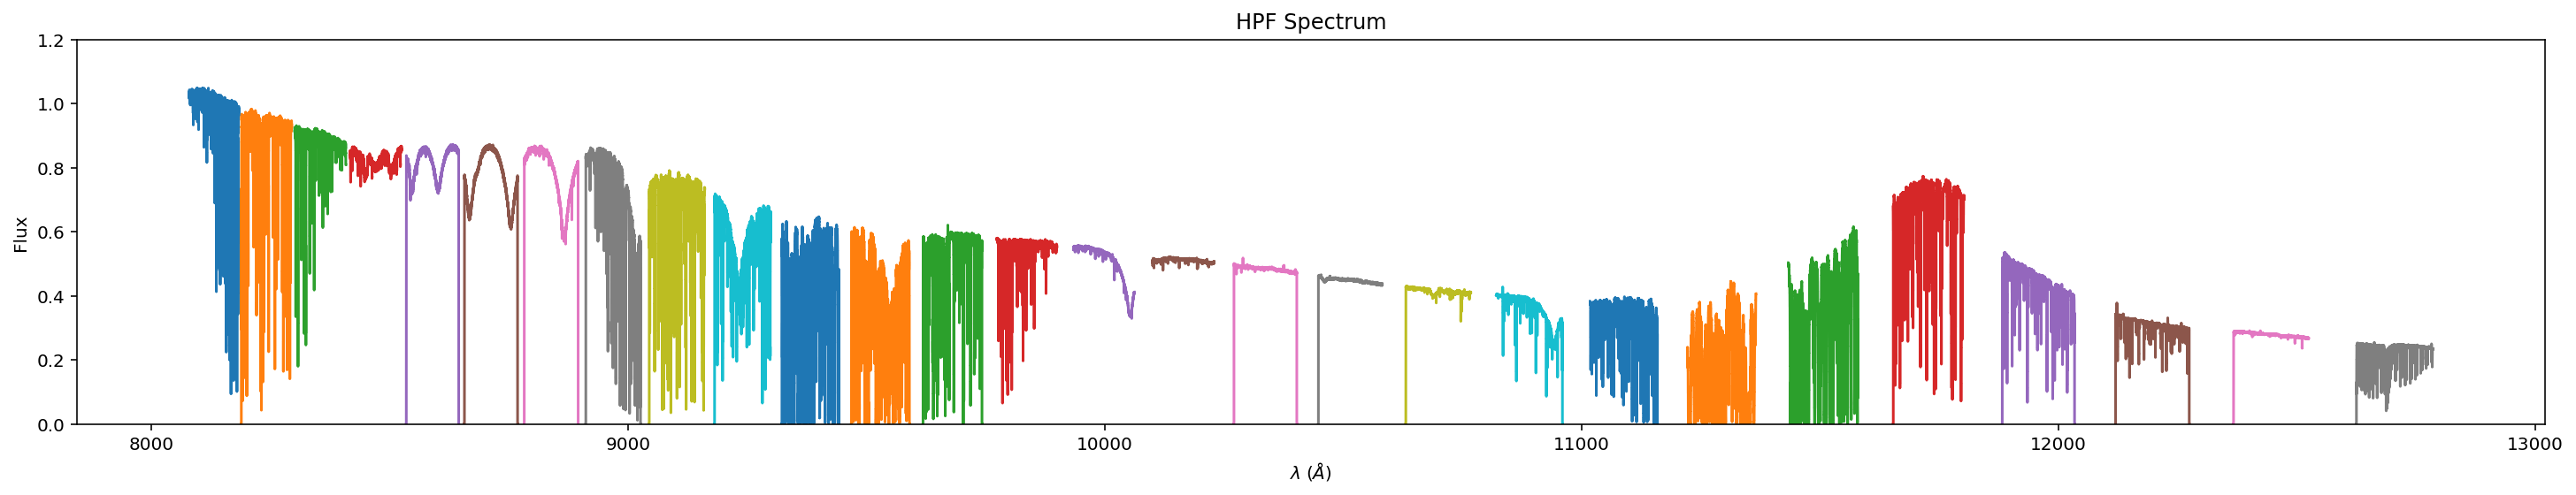

In [6]:
spectra.deblaze().normalize().plot(ylo=0);

This pattern will look familiar to most infrared astronomers: a Rayleigh-Jeans tail, atmospheric windows, and Hydrogen lines.